# Training

**Paper:** Bioacoustic classification of Hainan Gibbon call types using Deep Learning

**Code Date:** April 2022

**Repository:** https://github.com/shelovescode000/Automated-classification-of-Hainan-Gibbon-call-types-using-deep-learning

**Notebook description:** Train a CNN on the augmented spectrogram images.

<hr>

**Note 1: Code was adapted from https://github.com/emmanueldufourq/GibbonClassifier.**



In [ ]:
colab = False

In [ ]:
if colab:
    !pip install SoundFile
    from google.colab import drive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    import tarfile

    # Google Authentication
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Download data files
    downloaded = drive.CreateFile({'id':"1u7orJHwGOMIcyqwiiEl2e7KEZpnT_0h7"})
    downloaded.GetContentFile('GibbonClassifierData.tar.gz')

    # Extract files to temporary location in Google Drive
    with tarfile.open('GibbonClassifierData.tar.gz', 'r:gz') as tar:
        tar.extractall()

In [1]:
from Train_Helper3 import *

## Parameters

In [2]:
audio_directory = 'Raw_Data/Train/'
timestamp_directory = 'Call_Labels/'
save_location = 'Pickled_Data/'
augment_directory = 'Augmented_Data/'
augment_image_directory = 'Augmented_Image_Data/'
training_file = 'Training_Files.txt'

audio_directory_validation = 'Raw_Data/Validation/'
timestamp_directory_validation = 'Call_Labels_Validation/'
save_location_validation = 'Pickled_Data_Validation/'
augment_directory_validation = 'Augmented_Data_Validation/'
augment_image_directory_validation = 'Augmented_Image_Data_Validation/'
validation_file = 'Validation_Files.txt'

audio_directory_testing = 'Raw_Data/Test/'
timestamp_directory_testing = 'Call_Labels_Testing/'
save_location_testing = 'Pickled_Data_Testing/'
augment_directory_testing = 'Images_Testing/'
augment_image_directory_testing = 'Images_Testing2/'
testing_file = 'Testing_Files.txt'

sample_rate = 4800
number_seconds_to_extract = 10
seed = 42
number_iterations = 1
augmentation_probability = 1.0
augmentation_amount_noise = 2
augmentation_amount_gibbon = 10

sample_rate = 4800
number_seconds_to_extract = 10
seed = 42
number_iterations = 1
augmentation_probability = 1.0
augmentation_amount_noise = 2
augmentation_amount_gibbon = 10

## Extract segments, preprocessing and augment all training files

In [ ]:
execute_preprocessing_all_files(training_file, audio_directory, 
                            sample_rate, timestamp_directory,
                            number_seconds_to_extract, save_location,
                            augmentation_amount_noise, augmentation_probability, 
                            augmentation_amount_gibbon, seed, augment_directory, augment_image_directory,
                            number_iterations)

## Begin training

In [4]:
from sklearn.utils import shuffle


In [3]:
    print('Loading data...')
    training_files = []
    validation_files = []
    gibbon_XB,gibbon_XC,gibbon_XD,non_gibbon_X = load_training_images(augment_image_directory, training_file)
    gibbon_XB_v,gibbon_XC_v,gibbon_XD_v,non_gibbon_X_v = load_training_images(augment_image_directory_validation, validation_file)
    
    print()
    print ('Data loaded.')
    print ('Processing...')
    X_train, Y_train = prepare_X_and_Y(gibbon_XB,gibbon_XC,gibbon_XD, non_gibbon_X)
    del gibbon_XB,gibbon_XC, gibbon_XD, non_gibbon_X
    X_val, Y_val = prepare_X_and_Y(gibbon_XB_v,gibbon_XC_v,gibbon_XD_v, non_gibbon_X_v)
    del gibbon_XB_v,gibbon_XC_v, gibbon_XD_v, non_gibbon_X_v    
    print ('Processing done.')
    print()
    print ('Shape of X', X_train.shape)
    print ('Shape of Y', Y_train.shape) #3310 #796  #38
    print ('Shape of X', X_val.shape)
    print ('Shape of Y', Y_val.shape)

Loading data...

----------------------------------
Reading file: HGSM3C_0+1_20150807_052200.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20150807_052200
Reading non-gibbon augmented file: HGSM3C_0+1_20150807_052200

----------------------------------
Reading file: HGSM3C_0+1_20150811_052300.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20150811_052300
Reading non-gibbon augmented file: HGSM3C_0+1_20150811_052300

----------------------------------
Reading file: HGSM3C_0+1_20160501_051500.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20160501_051500
Reading non-gibbon augmented file: HGSM3C_0+1_20160501_051500

----------------------------------
Reading file: HGSM3C_0+1_20160517_050800.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20160517_050800
Reading non-gibbon augmented file: HGSM3C_0+1_20160517_050800

----------------------------------
Reading file: HGSM3C_0+1_20160518_050700.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20160518_050700
Reading non

In [10]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        X_train, Y_train = shuffle(X_train,Y_train)
        X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model = network()
        model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model.summary()
        
        start = time.time()

        history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=32,
                  epochs=10,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model.load_weights("Experiments/weights_{}.hdf5".format(seed))
        train_acc = accuracy_score(np.argmax(model.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc)

        val_acc = accuracy_score(np.argmax(model.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 113, 173, 8)       2056      
                                                                 
 dropout (Dropout)           (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 43, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_1 (Dropout)         (None, 13, 28, 8)         0         
                                                  

In [5]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL1_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model1 = network1()
        model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model1.summary()
        
        start = time.time()

        history1 = model1.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=16,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model1.load_weights("Experiments/weights_MODEL1_{}.hdf5".format(seed))
        train_acc1 = accuracy_score(np.argmax(model1.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc1)

        val_acc1 = accuracy_score(np.argmax(model1.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc1)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 113, 173, 8)       2056      
                                                                 
 dropout (Dropout)           (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 43, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_1 (Dropout)         (None, 13, 28, 8)         0         
                                                  

In [8]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL2_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model2 = network2()
        model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model2.summary()
        
        start = time.time()

        history2 = model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=32,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model2.load_weights("Experiments/weights_MODEL2_{}.hdf5".format(seed))
        train_acc2 = accuracy_score(np.argmax(model2.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc2)

        val_acc2 = accuracy_score(np.argmax(model2.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc2)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 113, 173, 8)       2056      
                                                                 
 dropout_3 (Dropout)         (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 43, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_4 (Dropout)         (None, 13, 28, 8)         0         
                                                

In [9]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL3_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model3 = network3()
        model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model3.summary()
        
        start = time.time()

        history3 = model3.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=16,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model3.load_weights("Experiments/weights_MODEL3_{}.hdf5".format(seed))
        train_acc3 = accuracy_score(np.argmax(model3.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc3)

        val_acc3 = accuracy_score(np.argmax(model3.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc3)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 113, 173, 8)       2056      
                                                                 
 dropout_6 (Dropout)         (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 43, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_7 (Dropout)         (None, 13, 28, 8)         0         
                                                

In [10]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL4_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model4 = network4()
        model4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model4.summary()
        
        start = time.time()

        history4 = model4.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=32,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model4.load_weights("Experiments/weights_MODEL4_{}.hdf5".format(seed))
        train_acc4 = accuracy_score(np.argmax(model4.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc4)

        val_acc4 = accuracy_score(np.argmax(model4.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc4)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 113, 173, 8)       2056      
                                                                 
 dropout_9 (Dropout)         (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 43, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_10 (Dropout)        (None, 13, 28, 8)         0         
                                                

In [5]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_model5_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model5 = network5()
        model5.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model5.summary()
        
        start = time.time()

        history5 = model5.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=16,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model5.load_weights("Experiments/weights_model5_{}.hdf5".format(seed))
        train_acc5 = accuracy_score(np.argmax(model5.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc5)

        val_acc5 = accuracy_score(np.argmax(model5.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc5)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 113, 173, 8)       2056      
                                                                 
 dropout (Dropout)           (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 43, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_1 (Dropout)         (None, 13, 28, 8)         0         
                                                  

In [10]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL6_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model6 = network6()
        model6.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model6.summary()
        
        start = time.time()

        history6 = model6.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=32,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model6.load_weights("Experiments/weights_MODEL6_{}.hdf5".format(seed))
        train_acc6 = accuracy_score(np.argmax(model6.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc6)

        val_acc6 = accuracy_score(np.argmax(model6.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc6)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 113, 173, 8)       2056      
                                                                 
 dropout_15 (Dropout)        (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 43, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 28, 8)         16392     
                                                                 
 dropout_16 (Dropout)        (None, 13, 28, 8)         0         
                                                

In [11]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL8_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model8 = network1()
        model8.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model8.summary()
        
        start = time.time()

        history8 = model8.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=64,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model8.load_weights("Experiments/weights_MODEL8_{}.hdf5".format(seed))
        train_acc8 = accuracy_score(np.argmax(model8.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc8)

        val_acc8 = accuracy_score(np.argmax(model8.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc8)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 113, 173, 8)       2056      
                                                                 
 dropout_12 (Dropout)        (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 43, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_13 (Dropout)        (None, 13, 28, 8)         0         
                                                

In [12]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        #X_train, Y_train = shuffle(X_train,Y_train)
        #X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_MODEL9_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model9 = network4()
        model9.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model9.summary()
        
        start = time.time()

        history9 = model9.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=64,
                  epochs=7,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model9.load_weights("Experiments/weights_MODEL9_{}.hdf5".format(seed))
        train_acc9 = accuracy_score(np.argmax(model9.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc9)

        val_acc9 = accuracy_score(np.argmax(model9.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc9)

Iteration 0 starting...
experiment_id: 0
X_train: (48270, 128, 188, 1)
Y_train: (48270, 4)

X_val: (15170, 128, 188, 1)
Y_val: (15170, 4)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 113, 173, 8)       2056      
                                                                 
 dropout_15 (Dropout)        (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 43, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 28, 8)         16392     
                                                                 
 dropout_16 (Dropout)        (None, 13, 28, 8)         0         
                                                

In [14]:
print("model 0:")
print("training accuracy = ",)
print("validation accuracy = ",)
print("model 1:")
print("training accuracy = ",train_acc1)
print("validation accuracy = ",val_acc1)
print("model 2:")
print("training accuracy = ",train_acc2)
print("validation accuracy = ",val_acc2)
print("model 3:")
print("training accuracy = ",train_acc3)
print("validation accuracy = ",val_acc3)
print("model 4:")
print("training accuracy = ",train_acc4)
print("validation accuracy = ",val_acc4)
print("model 5:")
print("training accuracy = ",train_acc5)
print("validation accuracy = ",val_acc5)
print("model 6:")
print("training accuracy = ",train_acc6)
print("validation accuracy = ",val_acc6)
print("model 8:")
print("training accuracy = ",train_acc8)
print("validation accuracy = ",val_acc8)
print("model 9:")
print("training accuracy = ",train_acc9)
print("validation accuracy = ",val_acc9)

model 0:
training accuracy = 
validation accuracy = 
model 1:
training accuracy =  0.9192044748290864
validation accuracy =  0.6940013183915623
model 2:
training accuracy =  0.9241765071472965
validation accuracy =  0.7569545154911008
model 3:
training accuracy =  0.9099440646364202
validation accuracy =  0.7462096242584048
model 4:
training accuracy =  0.8646985705407085
validation accuracy =  0.7301911667765326
model 5:
training accuracy =  0.906297907603066
validation accuracy =  0.7625576796308504
model 6:
training accuracy =  0.8832608245286928
validation accuracy =  0.6801582069874753
model 8:
training accuracy =  0.9302258131344521
validation accuracy =  0.7647330257086354
model 9:
training accuracy =  0.894178578827429
validation accuracy =  0.7266315095583388


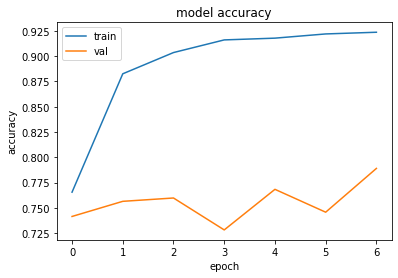

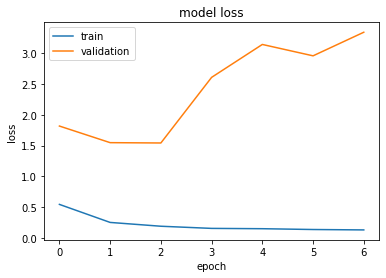

In [6]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
        
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
        

In [45]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(np.argmax(Y_val,1), np.argmax(model2.predict(X_val),1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(np.argmax(Y_val,1), np.argmax(model2.predict(X_val),1), digits=3))

[[7097   94  189  160]
 [ 618  850  216 1096]
 [  50   20 1629  671]
 [ 331   32  210 1907]]
              precision    recall  f1-score   support

           0      0.877     0.941     0.908      7540
           1      0.853     0.306     0.450      2780
           2      0.726     0.687     0.706      2370
           3      0.497     0.769     0.604      2480

    accuracy                          0.757     15170
   macro avg      0.738     0.676     0.667     15170
weighted avg      0.787     0.757     0.743     15170



In [41]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(np.argmax(Y_val,1), np.argmax(model3.predict(X_val),1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(np.argmax(Y_val,1), np.argmax(model3.predict(X_val),1), digits=3))

[[7214   16   95  215]
 [ 690  858  327  905]
 [  50   65 1288  967]
 [ 421   25   74 1960]]
              precision    recall  f1-score   support

           0      0.861     0.957     0.907      7540
           1      0.890     0.309     0.458      2780
           2      0.722     0.543     0.620      2370
           3      0.484     0.790     0.601      2480

    accuracy                          0.746     15170
   macro avg      0.739     0.650     0.646     15170
weighted avg      0.783     0.746     0.730     15170



In [44]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(np.argmax(Y_val,1), np.argmax(model4.predict(X_val),1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(np.argmax(Y_val,1), np.argmax(model4.predict(X_val),1), digits=3))

[[7258    4   79  199]
 [ 890 1062  390  438]
 [  76   70  708 1516]
 [ 319   10  102 2049]]
              precision    recall  f1-score   support

           0      0.850     0.963     0.903      7540
           1      0.927     0.382     0.541      2780
           2      0.554     0.299     0.388      2370
           3      0.488     0.826     0.613      2480

    accuracy                          0.730     15170
   macro avg      0.704     0.617     0.611     15170
weighted avg      0.758     0.730     0.709     15170



In [7]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(np.argmax(Y_val,1), np.argmax(model5.predict(X_val),1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(np.argmax(Y_val,1), np.argmax(model5.predict(X_val),1), digits=3))

[[7076  223  174   67]
 [ 665  724  322 1069]
 [  53   14 2112  191]
 [ 242    7  174 2057]]
              precision    recall  f1-score   support

           0      0.881     0.938     0.909      7540
           1      0.748     0.260     0.386      2780
           2      0.759     0.891     0.820      2370
           3      0.608     0.829     0.702      2480

    accuracy                          0.789     15170
   macro avg      0.749     0.730     0.704     15170
weighted avg      0.793     0.789     0.765     15170



In [43]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(np.argmax(Y_val,1), np.argmax(model8.predict(X_val),1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(np.argmax(Y_val,1), np.argmax(model8.predict(X_val),1), digits=3))

[[7069   74  247  150]
 [ 461  720  277 1322]
 [  50   10 1889  421]
 [ 308   30  219 1923]]
              precision    recall  f1-score   support

           0      0.896     0.938     0.916      7540
           1      0.863     0.259     0.398      2780
           2      0.718     0.797     0.755      2370
           3      0.504     0.775     0.611      2480

    accuracy                          0.765     15170
   macro avg      0.745     0.692     0.670     15170
weighted avg      0.798     0.765     0.746     15170



In [40]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(np.argmax(Y_val,1), np.argmax(model9.predict(X_val),1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(np.argmax(Y_val,1), np.argmax(model9.predict(X_val),1), digits=3))

[[7186   14  179  161]
 [ 662  808  222 1088]
 [  60  260  836 1214]
 [ 212    0   75 2193]]
              precision    recall  f1-score   support

           0      0.885     0.953     0.918      7540
           1      0.747     0.291     0.418      2780
           2      0.637     0.353     0.454      2370
           3      0.471     0.884     0.615      2480

    accuracy                          0.727     15170
   macro avg      0.685     0.620     0.601     15170
weighted avg      0.753     0.727     0.704     15170

